## Summary
This notebook cleans and merges several of the census tables along with a table containing the geometry of the census tracts into one dataset. We do a similar process with the school census data, but for that one we only need to merge the basic table with the geometry dataset. 

I rename all variables for easier clarity. 

The result of this notebook are two .csv files: dem_census.csv and school_census.csv

In [1]:
import numpy as np
import pandas as pd

## Census

### Basic Data

In [147]:
# Basic data

# Columns to import
basic_df = pd.read_csv(
    "/Users/feliphlvo/Documents/Minerva/Capstone/data/Raw/Base dos Dados/setor_censitario_basico_2010.csv",
    usecols=["id_setor_censitario", "sigla_uf", "v001", "v002", "v005"],
)

# Renaming columns
rename_dict = {
    "id_setor_censitario": "sector_id",
    "sigla_uf": "state",
    "v001": "n_households",
    "v002": "n_people",
    "v005": "avg_monthly_earnings",
}
basic_df = basic_df.rename(columns=rename_dict)
basic_df.head()

,sector_id,state,n_households,n_people,avg_monthly_earnings
0,170025105000002,TO,115.0,300.0,648.06
1,170025105000003,TO,59.0,167.0,433.73
2,170030105000001,TO,286.0,1123.0,927.45
3,170030105000002,TO,294.0,1101.0,478.33
4,170030105000003,TO,102.0,385.0,453.32


In [148]:
basic_df.isna().sum()

sector_id                 0
state                     0
n_households            773
n_people                773
avg_monthly_earnings    773
dtype: int64

### Data on people aged 15-17

In [149]:
# School aged children (15-17)


# Count of people of different races at school age
school_aged_races_df = pd.read_csv(
    "/Users/feliphlvo/Documents/Minerva/Capstone/data/Raw/Base dos Dados/setor_censitario_raca_idade_genero_2010.csv",
    usecols=["id_setor_censitario", "v027", "v028", "v029", "v030", "v031"],
)

# Count of men at school age
school_aged_men_df = pd.read_csv(
    "/Users/feliphlvo/Documents/Minerva/Capstone/data/Raw/Base dos Dados/setor_censitario_idade_homens_2010.csv",
    usecols=["id_setor_censitario", "v049", "v050", "v051"],
)

# Count of women at school age
school_aged_women_df = pd.read_csv(
    "/Users/feliphlvo/Documents/Minerva/Capstone/data/Raw/Base dos Dados/setor_censitario_idade_mulheres_2010.csv",
    usecols=["id_setor_censitario", "v049", "v050", "v051"],
)

# Total count of people at school age
school_aged_total_df = pd.read_csv(
    "/Users/feliphlvo/Documents/Minerva/Capstone/data/Raw/Base dos Dados/setor_censitario_idade_total_2010.csv",
    usecols=["id_setor_censitario", "v049", "v050", "v051"],
)


# Renaming columns

school_aged_races_df = school_aged_races_df.rename(
    columns={
        "id_setor_censitario": "sector_id",
        "v027": "n_people_15to17_white",
        "v028": "n_people_15to17_black",
        "v029": "n_people_15to17_asian",
        "v030": "n_people_15to17_parda",
        "v031": "n_people_15to17_indigenous",
    }
)

# Male
school_aged_men_df = school_aged_men_df.rename(
    columns={
        "id_setor_censitario": "sector_id",
        "v049": "n_people_15_men",
        "v050": "n_people_16_men",
        "v051": "n_people_17_men"
    }
)

# Female
school_aged_women_df = school_aged_women_df.rename(
    columns={
        "id_setor_censitario": "sector_id",
        "v049": "n_people_15_women",
        "v050": "n_people_16_women",
        "v051": "n_people_17_women"
    }
)

school_aged_total_df = school_aged_total_df.rename(
    columns={
        "id_setor_censitario": "sector_id",
        "v049": "n_people_15",
        "v050": "n_people_16",
        "v051": "n_people_17"
    }
)


# Joining
school_aged_df = pd.merge(school_aged_races_df, school_aged_total_df, on="sector_id", how = "outer")
school_aged_df = pd.merge(school_aged_df, school_aged_men_df, on="sector_id", how = "left")
school_aged_df = pd.merge(school_aged_df, school_aged_women_df, on="sector_id", how = "left")


# Adding up to get total people aged 15 to 17
school_aged_df["n_people_15to17"] = school_aged_df["n_people_15"] + school_aged_df["n_people_16"] + school_aged_df["n_people_17"]
school_aged_df["n_people_15to17_alternative"] = school_aged_df.loc[:, "n_people_15to17_white":"n_people_15to17_indigenous"].sum(1)
school_aged_df.head()

,sector_id,n_people_15to17_white,n_people_15to17_black,n_people_15to17_asian,n_people_15to17_parda,n_people_15to17_indigenous,n_people_15,n_people_16,n_people_17,n_people_15_men,n_people_16_men,n_people_17_men,n_people_15_women,n_people_16_women,n_people_17_women,n_people_15to17,n_people_15to17_alternative
0,140002705000001,13.0,1.0,1.0,54.0,9.0,28.0,27.0,23.0,16.0,14.0,11.0,12.0,13.0,12.0,78.0,78.0
1,140002705000002,0.0,0.0,0.0,4.0,0.0,1.0,2.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,4.0
2,140002705000003,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
3,140002705000004,0.0,0.0,0.0,1.0,2.0,1.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,3.0,3.0
4,140002705000005,0.0,0.0,0.0,0.0,13.0,7.0,5.0,1.0,3.0,3.0,1.0,4.0,2.0,0.0,13.0,13.0


In [150]:
# Percentage of times that the sum agree with each other
np.mean(school_aged_df["n_people_15to17"] == school_aged_df["n_people_15to17_alternative"])

0.979369276409132

In [151]:
school_aged_df.isnull().sum()

sector_id                         0
n_people_15to17_white          6302
n_people_15to17_black          6302
n_people_15to17_asian          6302
n_people_15to17_parda          6302
n_people_15to17_indigenous     6302
n_people_15                    6302
n_people_16                    6302
n_people_17                    6302
n_people_15_men                6302
n_people_16_men                6302
n_people_17_men                6302
n_people_15_women              6302
n_people_16_women              6302
n_people_17_women              6302
n_people_15to17                6302
n_people_15to17_alternative       0
dtype: int64

### Geolocation data

In [152]:
# Data from geobr package
geo_df = pd.read_csv(
    "/Users/feliphlvo/Documents/Minerva/Capstone/data/Raw/Base dos Dados/geobr_setor_censitario_2010.csv"
)
rename_dict = {
    "id_setor_censitario": "sector_id",
    "sigla_uf": "state_abbrev",
    "zona": "zone",
    "id_uf": "state_id",
    "id_municipio": "city_id",
    "id_distrito": "district_id",
    "id_subdistrito": "subdistrict_id",
    "id_setor": "sector_id",
    "id_microregiao": "microregion_id",
    "id_vizinhanca": "neighborhood_id",
    "nome_municipio": "city_name",
    "nome_distrito": "district_name",
    "nome_subdistrito": "subdistrict_name",
    "nome_vizinhanca": "neighborhood_name",
    "geometria":"geometry"
}
geo_df = geo_df.rename(columns=rename_dict)

geo_df.zone = [1 if x == "URBANO" else 2 for x in geo_df.zone]
#geo_df = geo_df.drop("state", axis = 1)
geo_df.head()

,state_id,state_abbrev,city_id,city_name,district_id,district_name,subdistrict_id,subdistrict_name,neighborhood_name,neighborhood_id,sector_id,zone,geometry
0,16,AP,1600303,Macapá,160030305,Macapá,16003030500,NaN,Congos,1.600303e+11,160030305000413,1,"POLYGON((-51.08969592 0.0141339599999884, -51...."
1,16,AP,1600303,Macapá,160030305,Macapá,16003030500,NaN,Congos,1.600303e+11,160030305000414,1,"POLYGON((-51.08629608 0.00693296999998684, -51..."
2,16,AP,1600303,Macapá,160030305,Macapá,16003030500,NaN,Congos,1.600303e+11,160030305000415,1,"POLYGON((-51.0883415989108 0.0081305483532985,..."
3,16,AP,1600303,Macapá,160030305,Macapá,16003030500,NaN,Congos,1.600303e+11,160030305000416,1,"POLYGON((-51.08961708 0.00619100999998428, -51..."
4,16,AP,1600303,Macapá,160030305,Macapá,16003030500,NaN,Congos,1.600303e+11,160030305000417,1,POLYGON((-51.0946480437271 0.00696638253808538...


In [153]:
geo_df.isna().sum()

state_id                  0
state_abbrev              0
city_id                   0
city_name                 0
district_id               0
district_name             0
subdistrict_id            0
subdistrict_name     263233
neighborhood_name    210013
neighborhood_id      210013
sector_id                 0
zone                      0
geometry                  2
dtype: int64

### Merging Everything

In [154]:
dem_census_df = pd.merge(basic_df, school_aged_df, on="sector_id", how = "left")
print(dem_census_df.isnull().sum())
dem_census_df = pd.merge(dem_census_df, geo_df, on="sector_id", how = "left")


sector_id                         0
state                             0
n_households                    773
n_people                        773
avg_monthly_earnings            773
n_people_15to17_white          6302
n_people_15to17_black          6302
n_people_15to17_asian          6302
n_people_15to17_parda          6302
n_people_15to17_indigenous     6302
n_people_15                    6302
n_people_16                    6302
n_people_17                    6302
n_people_15_men                6302
n_people_16_men                6302
n_people_17_men                6302
n_people_15_women              6302
n_people_16_women              6302
n_people_17_women              6302
n_people_15to17                6302
n_people_15to17_alternative       0
dtype: int64


In [155]:
dem_census_df.head()

,sector_id,state,n_households,n_people,avg_monthly_earnings,n_people_15to17_white,n_people_15to17_black,n_people_15to17_asian,n_people_15to17_parda,n_people_15to17_indigenous,...,city_id,city_name,district_id,district_name,subdistrict_id,subdistrict_name,neighborhood_name,neighborhood_id,zone,geometry
0,170025105000002,TO,115.0,300.0,648.06,1.0,0.0,0.0,10.0,0.0,...,1700251.0,Abreulândia,170025105.0,Abreulândia,1.700251e+10,NaN,NaN,NaN,2.0,"POLYGON((-49.1474683391864 -9.57423749342587, ..."
1,170025105000003,TO,59.0,167.0,433.73,0.0,0.0,0.0,0.0,0.0,...,1700251.0,Abreulândia,170025105.0,Abreulândia,1.700251e+10,NaN,NaN,NaN,2.0,"POLYGON((-49.2918054788623 -9.32877409877353, ..."
2,170030105000001,TO,286.0,1123.0,927.45,10.0,2.0,3.0,59.0,0.0,...,1700301.0,Aguiarnópolis,170030105.0,Aguiarnópolis,1.700301e+10,NaN,NaN,NaN,1.0,"POLYGON((-47.4800002365659 -6.56077877086219, ..."
3,170030105000002,TO,294.0,1101.0,478.33,11.0,0.0,1.0,46.0,0.0,...,1700301.0,Aguiarnópolis,170030105.0,Aguiarnópolis,1.700301e+10,NaN,NaN,NaN,1.0,"POLYGON((-47.4668802455097 -6.56653402083836, ..."
4,170030105000003,TO,102.0,385.0,453.32,3.0,1.0,0.0,17.0,0.0,...,1700301.0,Aguiarnópolis,170030105.0,Aguiarnópolis,1.700301e+10,NaN,NaN,NaN,2.0,"POLYGON((-47.4673664540108 -6.53920941627379, ..."


In [156]:
dem_census_df.isnull().sum()

sector_id                           0
state                               0
n_households                      773
n_people                          773
avg_monthly_earnings              773
n_people_15to17_white            6302
n_people_15to17_black            6302
n_people_15to17_asian            6302
n_people_15to17_parda            6302
n_people_15to17_indigenous       6302
n_people_15                      6302
n_people_16                      6302
n_people_17                      6302
n_people_15_men                  6302
n_people_16_men                  6302
n_people_17_men                  6302
n_people_15_women                6302
n_people_16_women                6302
n_people_17_women                6302
n_people_15to17                  6302
n_people_15to17_alternative         0
state_id                           29
state_abbrev                       29
city_id                            29
city_name                          29
district_id                        29
district_nam

### Importing the basic dataset which includes microregions

In [157]:
# importing basic dataframe
basic = pd.read_csv("/Users/feliphlvo/Documents/Minerva/Capstone/data/Raw/basico.csv", index_col=0)

/var/folders/v6/m0s_jr6d723809xzpzrvx_340000gn/T/ipykernel_1752/887339097.py:2: DtypeWarning: Columns (4,16) have mixed types. Specify dtype option on import or set low_memory=False.
  basic = pd.read_csv("/Users/feliphlvo/Documents/Minerva/Capstone/data/Raw/basico.csv", index_col=0)


In [158]:
basic = basic.rename({
    "Cod_setor":"sector_id", 
    "Cod_micro": "microregion_id",
    "Nome_da_micro":"microregion_name",
    "Nome_da_meso": "mesoregion_name",
    "Cod_meso": "mesoregion_id"}, axis=1)
basic.head()

,sector_id,Cod_Grandes Regiões,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,mesoregion_id,mesoregion_name,microregion_id,microregion_name,Cod_RM,...,V005,V006,V007,V008,V009,V010,V011,V012,Cod_Grandes Regi�es,Unnamed: 33
0,350010505000001,3.0,Região Sudeste,SP,São Paulo,3508,Presidente Prudente,35035,Adamantina,0,...,"2103,64","4968912,37","2191,9","4984036,79","1530,51","4163648,03","1901,54","4468808,1",NaN,NaN
1,350010505000002,3.0,Região Sudeste,SP,São Paulo,3508,Presidente Prudente,35035,Adamantina,0,...,"1899,91","3969367,45","1980,76","3978169,48","1180,37","2621328,25","1572,39","2875973,5",NaN,NaN
2,350010505000003,3.0,Região Sudeste,SP,São Paulo,3508,Presidente Prudente,35035,Adamantina,0,...,"3170,82","14377539,93","3246,68","14475686,47","1908,64","10014924,33","2536,42",11721183,NaN,NaN
3,350010505000004,3.0,Região Sudeste,SP,São Paulo,3508,Presidente Prudente,35035,Adamantina,0,...,"2782,6","12624098,34","2882,7","12790260,49","1583,46","7209788,84","2141,47","8558034,75",NaN,NaN
4,350010505000005,3.0,Região Sudeste,SP,São Paulo,3508,Presidente Prudente,35035,Adamantina,0,...,"2050,27","101395096,1","2455,27",120508046,"1423,52","40900639,93","1908,13","53922664,72",NaN,NaN


In [159]:
# Merging the basic dataframe with the census tracts
dem_census_df = dem_census_df.merge(basic[["sector_id", "microregion_id", "microregion_name", "mesoregion_id", "mesoregion_name"]], on="sector_id", how="left")

## School Census

In [160]:
# Downloaded from: https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/censo-escolar

school_df = pd.read_csv(
    "/Users/feliphlvo/Documents/Minerva/Capstone/data/Raw/Censo Escolar 2020/dados/microdados_ed_basica_2020.CSV",
    encoding="latin-1",
    sep=";",
    usecols=[
        "CO_ENTIDADE",
        "NO_REGIAO",
        "CO_REGIAO",
        "NO_UF",
        "SG_UF",
        "CO_UF",
        "NO_MUNICIPIO",
        "CO_MUNICIPIO",
        "NO_MESORREGIAO",
        "CO_MESORREGIAO",
        "NO_MICRORREGIAO",
        "CO_MICRORREGIAO",
        "NO_ENTIDADE",
        "CO_DISTRITO",
        "TP_DEPENDENCIA",
        "TP_LOCALIZACAO",
        "DS_ENDERECO",
        "NU_ENDERECO",
        "DS_COMPLEMENTO",
        "NO_BAIRRO",
        "CO_CEP",
        "QT_MAT_MED",
        "QT_DOC_MED",
        "QT_TUR_MED",
    ],
)

school_df = school_df.rename(
    columns={
        "CO_ENTIDADE": "school_id",
        "NO_REGIAO": "region_name",
        "CO_REGIAO": "region_id",
        "NO_UF": "state_name",
        "SG_UF": "state_abbrev",
        "CO_UF": "state_id",
        "NO_MUNICIPIO": "city_name",
        "CO_MUNICIPIO": "city_id",
        "NO_MESORREGIAO": "mesoregion_name",
        "CO_MESORREGIAO": "mesoregion_id",
        "NO_MICRORREGIAO": "microregion_name",
        "CO_MICRORREGIAO": "microregion_id",
        "NO_ENTIDADE": "school_name",
        "CO_DISTRITO": "sector_id",
        "TP_DEPENDENCIA": "admin_type",
        "TP_LOCALIZACAO": "location_type",
        "DS_ENDERECO": "address",
        "NU_ENDERECO": "address_number",
        "DS_COMPLEMENTO": "address_complement",
        "NO_BAIRRO": "neighborhood",
        "CO_CEP": "zip_code",
        "QT_MAT_MED": "n_students",
        "QT_DOC_MED": "n_teachers",
        "QT_TUR_MED": "n_classes",
    }
)
school_df.head()

,region_name,region_id,state_name,state_abbrev,state_id,city_name,city_id,mesoregion_name,mesoregion_id,microregion_name,...,admin_type,location_type,address,address_number,address_complement,neighborhood,zip_code,n_students,n_teachers,n_classes
0,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Leste Rondoniense,1102,Cacoal,...,2,2,TERRA INDIGENA RIO BRANCO,NaN,ALDEIA COLORADO,RURAL,76954000.0,0.0,0.0,0.0
1,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Leste Rondoniense,1102,Cacoal,...,2,1,AVENIDA RIO DE JANEIRO,4776,ESCOLA,CIDADE ALTA,76954000.0,0.0,0.0,0.0
2,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Leste Rondoniense,1102,Cacoal,...,3,2,LINHA 60 COM A 140,NaN,NaN,NaN,76954000.0,0.0,0.0,0.0
3,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Leste Rondoniense,1102,Cacoal,...,3,1,ROLIM DE MOURA DO GUAPORE,NaN,NaN,NaN,76954000.0,0.0,0.0,0.0
4,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Leste Rondoniense,1102,Cacoal,...,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [161]:
school_df.isnull().sum()

region_name                0
region_id                  0
state_name                 0
state_abbrev               0
state_id                   0
city_name                  0
city_id                    0
mesoregion_name            0
mesoregion_id              0
microregion_name           0
microregion_id             0
sector_id                  0
school_id                  0
school_name                0
admin_type                 0
location_type              0
address                 6120
address_number         56711
address_complement    155566
neighborhood           42297
zip_code                6119
n_students             44696
n_teachers             45180
n_classes              44696
dtype: int64

### Geolocation data

In [162]:
geo_school_df = pd.read_csv(
    "/Users/feliphlvo/Documents/Minerva/Capstone/data/Raw/Base dos Dados/geobr_escola_2020.csv"
)
geo_school_df = geo_school_df.rename(
    columns={"id_escola": "school_id", "geometria": "geometry"}
)
geo_school_df.head()

,sigla_uf,school_id,geometry
0,RO,11000023,POINT (-63.8540109 -8.758459)
1,RO,11000040,POINT (-63.88391863 -8.79373016)
2,RO,11000058,POINT (-63.9019859 -8.7607343)
3,RO,11000082,POINT (-63.8961767 -8.765205)
4,RO,11000104,POINT (-63.8754712 -8.7686325)


In [163]:
geo_school_df.isnull().sum()

sigla_uf     0
school_id    0
geometry     0
dtype: int64

## Merging

In [164]:
school_census_df = pd.merge(school_df, geo_school_df, on="school_id", how="outer")

In [165]:
school_census_df.isna().sum()

region_name             2182
region_id               2182
state_name              2182
state_abbrev            2182
state_id                2182
city_name               2182
city_id                 2182
mesoregion_name         2182
mesoregion_id           2182
microregion_name        2182
microregion_id          2182
sector_id               2182
school_id                  0
school_name             2182
admin_type              2182
location_type           2182
address                 8302
address_number         58893
address_complement    157748
neighborhood           44479
zip_code                8301
n_students             46878
n_teachers             47362
n_classes              46878
sigla_uf                3475
geometry                3475
dtype: int64

### Estimating the address of schools that don't have a geolocation - TBD

In [31]:
# no_loc = school_census_df[school_census_df.geometry.isna() & ~school_census_df.zip_code.isna()].reset_index()

# # Create column with full address ignoring null values
# no_loc["full_address"] = no_loc["address"].fillna("") + "" + no_loc["address_number"].astype(str).fillna("") + ", " + no_loc["address_complement"].fillna("") + ", " + no_loc["neighborhood"].fillna("") + ", " + no_loc["city_name"].fillna("") + ", " + no_loc["state_abbrev"].fillna("") + ", " + no_loc["zip_code"].astype(int).astype(str).fillna("")

# no_loc["full_address"][0]

'AVENIDA HUGO WALDEMAR FREY5454, , JARDIM ALVORADA, Ariquemes, RO, 76870970'

In [80]:
# import geocoder
# g = geocoder.google('white house', method='places')


ValueError: Provide API Key

In [71]:
# # Estimate the locations of the schools that have a zip code but no geometry
# from geopy.geocoders import Nominatim
# from geopy.extra.rate_limiter import RateLimiter
# geolocator = Nominatim(user_agent="felipe's application")
# geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# for i in no_loc["full_address"]:
#     print(geocode(i))






None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


KeyboardInterrupt: 

### Transforming into geometry

In [166]:
# This is a helper function to make grometries work
import geopandas as gpd
from shapely import wkt

def wkt_loads(x):
    try:
        return wkt.loads(x)
    except Exception:
        return None
dem_census_df["geometry"] = dem_census_df['geometry'].apply(wkt_loads)
school_census_df["geometry"] = school_census_df['geometry'].apply(wkt_loads)

# Tranform the dataframes into geodataframes
geo_dem_census_df = gpd.GeoDataFrame(dem_census_df, crs = "EPSG:4674", geometry = 'geometry')
geo_school_census_df = gpd.GeoDataFrame(school_census_df, crs = "EPSG:4674", geometry = 'geometry')

/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/geopandas/array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/geopandas/geodataframe.py:34: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  out = from_shapely(data)


In [174]:
geo_dem_census_df.is_empty.sum()

31

In [167]:
# Transform nan geometries into empty geometries
from shapely.geometry.collection import GeometryCollection

geo_school_census_df["geometry"] = geo_school_census_df.geometry.apply(lambda x: x if x else GeometryCollection())
geo_dem_census_df["geometry"] = geo_dem_census_df.geometry.apply(lambda x: x if x else GeometryCollection())

/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/geopandas/array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/geopandas/geoseries.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  data = from_shapely(s.values)
/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/geopandas/array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


In [168]:
geo_dem_census_df.head()

,sector_id,state,n_households,n_people,avg_monthly_earnings,n_people_15to17_white,n_people_15to17_black,n_people_15to17_asian,n_people_15to17_parda,n_people_15to17_indigenous,...,subdistrict_id,subdistrict_name,neighborhood_name,neighborhood_id,zone,geometry,microregion_id,microregion_name,mesoregion_id,mesoregion_name
0,170025105000002,TO,115.0,300.0,648.06,1.0,0.0,0.0,10.0,0.0,...,1.700251e+10,NaN,NaN,NaN,2.0,"POLYGON ((-49.14747 -9.57424, -49.14425 -9.576...",17003.0,Miracema do Tocantins,1701.0,Ocidental do Tocantins
1,170025105000003,TO,59.0,167.0,433.73,0.0,0.0,0.0,0.0,0.0,...,1.700251e+10,NaN,NaN,NaN,2.0,"POLYGON ((-49.29181 -9.32877, -49.29418 -9.329...",17003.0,Miracema do Tocantins,1701.0,Ocidental do Tocantins
2,170030105000001,TO,286.0,1123.0,927.45,10.0,2.0,3.0,59.0,0.0,...,1.700301e+10,NaN,NaN,NaN,1.0,"POLYGON ((-47.48000 -6.56078, -47.45877 -6.547...",17001.0,Bico do Papagaio,1701.0,Ocidental do Tocantins
3,170030105000002,TO,294.0,1101.0,478.33,11.0,0.0,1.0,46.0,0.0,...,1.700301e+10,NaN,NaN,NaN,1.0,"POLYGON ((-47.46688 -6.56653, -47.46468 -6.566...",17001.0,Bico do Papagaio,1701.0,Ocidental do Tocantins
4,170030105000003,TO,102.0,385.0,453.32,3.0,1.0,0.0,17.0,0.0,...,1.700301e+10,NaN,NaN,NaN,2.0,"POLYGON ((-47.46737 -6.53921, -47.46668 -6.539...",17001.0,Bico do Papagaio,1701.0,Ocidental do Tocantins


In [169]:
# Convert geometries into projection for Latin America, measured in meters
geo_dem_census_df = geo_dem_census_df.to_crs(epsg = 5641)
geo_school_census_df = geo_school_census_df.to_crs(epsg = 5641)

/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/geopandas/array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/geopandas/array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/geopandas/geoseries.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  data = from_shapely(s.values)


In [170]:
geo_dem_census_df.head()

,sector_id,state,n_households,n_people,avg_monthly_earnings,n_people_15to17_white,n_people_15to17_black,n_people_15to17_asian,n_people_15to17_parda,n_people_15to17_indigenous,...,subdistrict_id,subdistrict_name,neighborhood_name,neighborhood_id,zone,geometry,microregion_id,microregion_name,mesoregion_id,mesoregion_name
0,170025105000002,TO,115.0,300.0,648.06,1.0,0.0,0.0,10.0,0.0,...,1.700251e+10,NaN,NaN,NaN,2.0,"POLYGON ((4316081.044 8936951.569, 4316439.062...",17003.0,Miracema do Tocantins,1701.0,Ocidental do Tocantins
1,170025105000003,TO,59.0,167.0,433.73,0.0,0.0,0.0,0.0,0.0,...,1.700251e+10,NaN,NaN,NaN,2.0,"POLYGON ((4300023.229 8964455.368, 4299759.347...",17003.0,Miracema do Tocantins,1701.0,Ocidental do Tocantins
2,170030105000001,TO,286.0,1123.0,927.45,10.0,2.0,3.0,59.0,0.0,...,1.700301e+10,NaN,NaN,NaN,1.0,"POLYGON ((4501590.424 9273374.768, 4503952.106...",17001.0,Bico do Papagaio,1701.0,Ocidental do Tocantins
3,170030105000002,TO,294.0,1101.0,478.33,11.0,0.0,1.0,46.0,0.0,...,1.700301e+10,NaN,NaN,NaN,1.0,"POLYGON ((4503050.051 9272734.519, 4503294.923...",17001.0,Bico do Papagaio,1701.0,Ocidental do Tocantins
4,170030105000003,TO,102.0,385.0,453.32,3.0,1.0,0.0,17.0,0.0,...,1.700301e+10,NaN,NaN,NaN,2.0,"POLYGON ((4502995.960 9275774.210, 4503071.882...",17001.0,Bico do Papagaio,1701.0,Ocidental do Tocantins


/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/geopandas/plotting.py:33: ShapelyDeprecationWarnin

<AxesSubplot:>

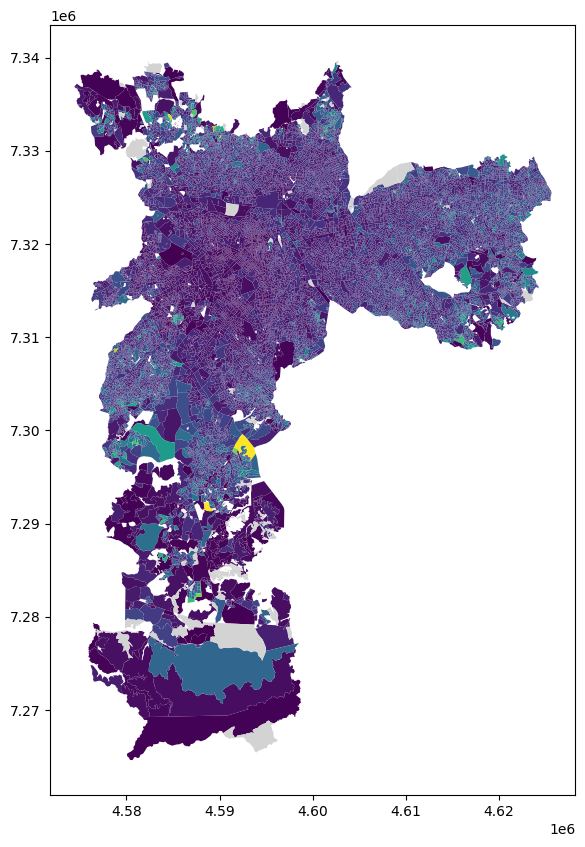

In [130]:
# Plot Sao Paulo
geo_dem_census_df[geo_dem_census_df["city_name"] == "São Paulo"].plot("n_people_15to17", figsize = (10,10), missing_kwds={"color": "lightgrey"})

## Saving to CSV

In [171]:
# Saving Dataset to CSV
# I will save one  copy in the local folder and a few zipped files in the Final folder
geo_dem_census_df.to_csv(
    "/Users/feliphlvo/Documents/Minerva/Capstone/data/Local/dem_census.csv")

# Only southeast region
compression_opts = dict(method='zip',
                        archive_name='dem_census_shoutheast.csv')
geo_dem_census_df[geo_dem_census_df.state_abbrev.isin(["SP", "RJ", "MG", "ES"])].to_csv(
    "/Users/feliphlvo/Documents/Minerva/Capstone/data/Final/dem_census_southeast.zip", compression=compression_opts)

# Only south region
compression_opts = dict(method='zip',
                        archive_name='dem_census_south.csv')
geo_dem_census_df[geo_dem_census_df.state_abbrev.isin(["PR", "SC", "RS"])].to_csv(
    "/Users/feliphlvo/Documents/Minerva/Capstone/data/Final/dem_census_south.zip", compression=compression_opts)

# others
compression_opts = dict(method='zip',
                        archive_name='dem_census_others.csv')
geo_dem_census_df[~geo_dem_census_df.state_abbrev.isin(["SP", "RJ", "MG", "ES", "PR", "SC", "RS"])].to_csv(
    "/Users/feliphlvo/Documents/Minerva/Capstone/data/Final/dem_census_others.zip", compression=compression_opts)


In [172]:
# Save one in the local folder and a few zipped files in the Final folder
geo_school_census_df.to_csv("/Users/feliphlvo/Documents/Minerva/Capstone/data/Local/school_census.csv")

# Zipped
compression_opts = dict(method='zip',archive_name = 'school_census.csv')
geo_school_census_df.to_csv("/Users/feliphlvo/Documents/Minerva/Capstone/data/Final/school_census.zip", compression=compression_opts)